1.a.

Consider the average empirical loss(the risk) for logistic regression,
Find the Hessian $H$ of this functioin, and show that for any vector $z$, it holds true that
$$ z^THz\geq 0$$

$$ J(\theta) = -\frac{1}{m}\sum_{i=1}^m\log(h_\theta(y^{(i)}x^{(i)}))))$$

Jacobian:

$$ \frac{\partial{J(\theta)}}{\partial{\theta_a}} = -\frac{1}{m}\sum_{i=1}^m \frac{1}{g(y^{(i)}\theta^Tx^{(i)})}\cdot\frac{\partial{g(y^{(i)}\theta^Tx^{(i)})}}{\partial{z}}\cdot \frac{\partial{z}}{\partial{\theta_a}}$$

\begin{align}
\frac{\partial{J(\theta)}}{\partial{\theta_a}} &= -\frac{1}{m}\sum_{i=1}^m \frac{1}{g(y^{(i)}\theta^Tx^{(i)})}\cdot\frac{\partial{g(y^{(i)}\theta^Tx^{(i)})}}{\partial{z}}\cdot \frac{\partial{z}}{\partial{\theta_a}} 
\\
&= -\frac{1}{m}\sum_{i=1}^m {\frac{1}{g(y^{(i)}\theta^Tx^{(i)})}}\cdot{g(y^{(i)}\theta^Tx^{(i)})}(1-g(y^{(i)}\theta^Tx^{(i)}))y^{(i)}x_a^{(i)}
\\
&=\frac{1}{m}\sum_{i=1}^m (g(y^{(i)}\theta^Tx^{(i)})-1)y^{(i)}x_a^{(i)}
\end{align}

Hessian

\begin{align}
\frac{\partial{J(\theta)}}{\partial{\theta_a}\partial{\theta_b}} &=\frac{1}{m}\sum_{i=1}^m (g(y^{(i)}\theta^Tx^{(i)})-1)y^{(i)}x_a^{(i)}
\\
&=\frac{1}{m}\sum_{i=1}^m g(y^{(i)}\theta^Tx^{(i)})(1-g(y^{(i)}\theta^Tx^{(i)})){(y^{(i)})}^2x_a^{(i)}x_b^{(i)}
\\
&=\frac{1}{m}\sum_{i=1}^m g(y^{(i)}\theta^Tx^{(i)})(1-g(y^{(i)}\theta^Tx^{(i)}))x_a^{(i)}x_b^{(i)}
\end{align}

Thus, 
$$ H = \frac{1}{m}\sum_{i=1}^m g(y^{(i)}\theta^Tx^{(i)})(1-g(y^{(i)}\theta^Tx^{(i)}))x^{(i)}{x^{(i)}}^T$$



$$z^THz = \frac{1}{m}\sum_{i=1}^m g(y^{(i)}\theta^Tx^{(i)})(1-g(y^{(i)}\theta^Tx^{(i)}))z^Txx^Tz$$

Note 

$$z^Txx^Tz = (z^Tx)(x^Tz) = (z^Tx)^2 \geq 0$$
$$H \in \mathbb{S}^n$$

and
\begin{align}
g(x) &\in (0, 1) 
\\
g(x)(1-g(x)) &\in (0, 1)
\end{align}
Thus,
$$\forall z, z^THz \geq 0$$
$$H \succeq 0$$ 

1.b

In [1]:
import numpy as np
import pandas as pd
from urllib import request
from io import StringIO

In [2]:
response_x = request.urlopen('http://cs229.stanford.edu/ps/ps1/logistic_x.txt')
x = response_x.read().decode('utf-8')
x = pd.read_csv(StringIO(x), sep='  ', header=None, engine='python')
response_y = request.urlopen('http://cs229.stanford.edu/ps/ps1/logistic_y.txt')
y = response_y.read().decode('utf-8')
y = pd.read_csv(StringIO(y), header=None)

In [3]:
x1 = x.values[:,0]
x2 = x.values[:,1]

In [4]:
import matplotlib.pyplot as plt  
import seaborn as sns
%matplotlib inline

In [5]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [6]:
x = np.column_stack((x,np.ones(x.shape[0])))

In [7]:
w = np.zeros(3)

In [8]:
jacobian = np.mean((sigmoid(x.dot(w).dot(y)) - 1) * y.values * x, 0)

hessian = np.mean(sigmoid(x.dot(w).dot(y)) * (1 - sigmoid(x.dot(w).dot(y))) * \
  np.apply_along_axis(lambda x: x.reshape(3,1).dot(x.reshape(1,3)),1,x), axis=0)

w = w - jacobian.dot(np.linalg.pinv(hessian))
w

array([ 0.43509696,  0.62161752, -1.50983811])

In [9]:
hessian

array([[ 4.76984544, -0.18171064,  0.98082384],
       [-0.18171064,  0.80740309, -0.08742426],
       [ 0.98082384, -0.08742426,  0.25      ]])

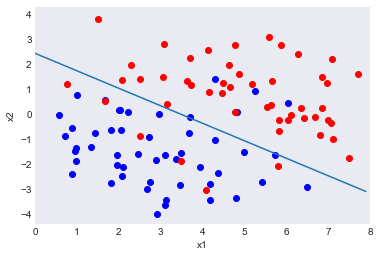

In [10]:
sns.set_style('dark')
plt.scatter(x=x1[np.squeeze((y==-1).values)], y=x2[np.squeeze((y==-1).values)], c='b')
plt.scatter(x=x1[np.squeeze((y==1).values)], y=x2[np.squeeze((y==1).values)], c='r')
xx1 = np.arange(0,8,0.1)
xx2 = (-w[2]-xx1*w[0])/w[1]
plt.plot(xx1,xx2)
plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim(0,8)
plt.show()